# Convolutional Neural Network

In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
# Constant Parameters
# Preprocessing Parameters
TRAIN_DIR = "../data/train/"
MODEL_DIR = "../models/"
VALIDATION_SPLIT = 0.2
IMAGE_HEIGHT = IMAGE_WIDTH = 128
SEED = 1

# Training Parameters
NUM_EPOCHS = 20
OPTIMIZER = keras.optimizers.Adam()
LOSS_FN = keras.losses.CategoricalCrossentropy()

In [3]:
# Model Architecture
def get_model(image_depth, num_classes):
    return keras.models.Sequential([
        keras.layers.Conv2D(32, 3, input_shape = (IMAGE_HEIGHT, IMAGE_WIDTH, image_depth)),
        keras.layers.MaxPool2D(pool_size = (2, 2)),
        keras.layers.Dropout(0.2),
        keras.layers.Flatten(),
        keras.layers.Dense(1024, activation = "relu"),
        keras.layers.Dense(num_classes, activation = "softmax")
    ])

## Preprocessing - RGB + Augment

In [4]:
model_id = "cnn_rgb_augment"              # Unique Identifier used for saving model
color_mode = "rgb"                        # "rgb", "rgba" or "grayscale"

# DO NOT CHANGE
if color_mode == "grayscale":
    image_depth = 1
elif color_mode == "rgb":
    image_depth = 3
elif color_mode == "rgba":
    image_depth = 4
else:
    raise Exception()

In [5]:
# Data Augmentation Parameters
image_generator = ImageDataGenerator(
    validation_split = VALIDATION_SPLIT,
    rescale = 1./255,
    rotation_range = 45,
    horizontal_flip = True,
    vertical_flip = True,
    zoom_range = 0.4
)

In [6]:
train_data_gen = image_generator.flow_from_directory(
    color_mode = color_mode,
    directory = TRAIN_DIR,
    target_size = (IMAGE_HEIGHT, IMAGE_WIDTH),
    shuffle = True,
    seed = SEED,
    class_mode = "categorical",
    subset = "training"
)

Found 84331 images belonging to 42 classes.


In [7]:
validation_data_gen = image_generator.flow_from_directory(
    color_mode = color_mode,
    directory = TRAIN_DIR,
    target_size = (IMAGE_HEIGHT, IMAGE_WIDTH),
    class_mode = "categorical",
    subset = "validation"
)

Found 21061 images belonging to 42 classes.


In [8]:
model = get_model(image_depth, train_data_gen.num_classes)

In [9]:
model.compile(
    optimizer = OPTIMIZER,
    loss = LOSS_FN,
    metrics = ["accuracy"]
)

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 63, 63, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 127008)            0         
_________________________________________________________________
dense (Dense)                (None, 1024)              130057216 
_________________________________________________________________
dense_1 (Dense)              (None, 42)                43050     
Total params: 130,101,162
Trainable params: 130,101,162
Non-trainable params: 0
__________________________________________

In [11]:
history = model.fit(
    train_data_gen,
    epochs = NUM_EPOCHS,
    validation_data = validation_data_gen
)

Epoch 1/20
2636/2636 [==============================] - 1356s 515ms/step - loss: 3.5139 - accuracy: 0.0878 - val_loss: 3.4333 - val_accuracy: 0.1103
Epoch 2/20
2636/2636 [==============================] - 1340s 509ms/step - loss: 3.3924 - accuracy: 0.1184 - val_loss: 3.3529 - val_accuracy: 0.1279
Epoch 3/20
2636/2636 [==============================] - 1304s 495ms/step - loss: 3.3317 - accuracy: 0.1358 - val_loss: 3.3252 - val_accuracy: 0.1381
Epoch 4/20
2636/2636 [==============================] - 1287s 488ms/step - loss: 3.2861 - accuracy: 0.1462 - val_loss: 3.3092 - val_accuracy: 0.1404
Epoch 5/20
2636/2636 [==============================] - 1399s 531ms/step - loss: 3.2467 - accuracy: 0.1550 - val_loss: 3.2455 - val_accuracy: 0.1571
Epoch 6/20
2636/2636 [==============================] - 1295s 491ms/step - loss: 3.2188 - accuracy: 0.1620 - val_loss: 3.2148 - val_accuracy: 0.1690
Epoch 7/20
2636/2636 [==============================] - 1311s 497ms/step - loss: 3.1916 - accuracy: 0.1700

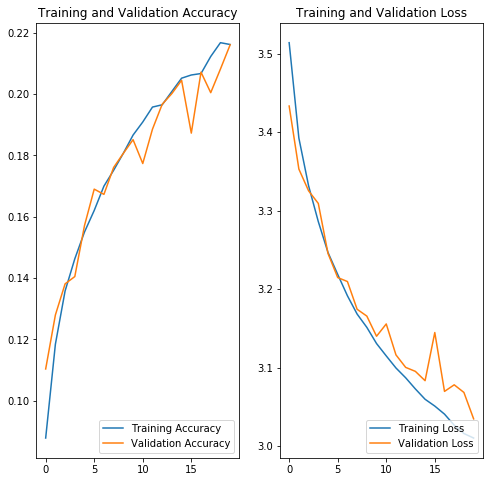

In [12]:
acc = history.history["accuracy"]
loss = history.history["loss"]
validation_acc = history.history["val_accuracy"]
validation_loss = history.history["val_loss"]

epochs_range = range(NUM_EPOCHS)

plt.figure(figsize = (8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label = "Training Accuracy")
plt.plot(epochs_range, validation_acc, label = "Validation Accuracy")
plt.legend(loc = "lower right")
plt.title("Training and Validation Accuracy")

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label = "Training Loss")
plt.plot(epochs_range, validation_loss, label = "Validation Loss")
plt.legend(loc = "lower right")
plt.title("Training and Validation Loss")
plt.show()

In [13]:
model.save(MODEL_DIR + "{}.h5".format(model_id))